In [20]:
# Decision trees in Supervised learning

In [21]:
import pandas as pd#for data preparation and processing
import numpy as np # for linear algrbra
import seaborn as sns # statistical data visulaization
import matplotlib.pyplot as plt
%matplotlib inline


import graphviz #visulization of the leaf nodes
# Manchine learning libraries
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# control display
pd.options.display.max_columns=50
sns.set(style='darkgrid', rc={'axes.facecolor': '#FFC9DEF5'})

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [22]:
df=pd.read_csv('heart_disease.csv')
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [23]:
"""cp=chest pain
trestbps=resting blood pressure
chol=cholesterol
fbs=fasting blood sugar
restecg=resting electocardiography
exang=exercise induces againa
oldpeak=ST depresion induced
slope=the slope of the
    """

'cp=chest pain\ntrestbps=resting blood pressure\nchol=cholesterol\nfbs=fasting blood sugar\nrestecg=resting electocardiography\nexang=exercise induces againa\noldpeak=ST depresion induced\nslope=the slope of the\n    '

In [24]:
# number of people with heart diseases
# column for target
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [25]:
# show percentange of male and female
count_female=len(df[df.sex==0])
count_male=len(df[df.sex==1])
# show output
print('Percentage of female patients:{:.2f}%'.format(count_female/(len(df.sex))*100))
print('Percentage of male patients:{:.2f}%'.format(count_male/(len(df.sex))*100))

Percentage of female patients:30.44%
Percentage of male patients:69.56%


In [26]:
# getting mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [27]:
# show null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
# create logistic regression
y=df.target.values
x_data=df.drop(['target'],axis=1)

In [29]:
# split the data for training  67% and testing 33%
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(x_data,y,test_size=0.33,random_state=42)

In [30]:
# check shape of data remaing for traing and testing
X_train.shape,X_test.shape

((686, 13), (339, 13))

In [31]:
# check datatype
X_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [32]:
# check x train header
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
866,41,1,2,112,250,0,1,179,0,0.0,2,0,2
749,58,1,1,125,220,0,1,144,0,0.4,1,4,3
212,50,1,0,150,243,0,0,128,0,2.6,1,0,3
79,52,1,1,134,201,0,1,158,0,0.8,2,1,2
148,52,1,3,152,298,1,1,178,0,1.2,1,0,3


In [33]:
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [34]:
# predict the class label for the test data using the decision tree classifier
y_pred_gini=clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with criteria gini index:{0:0.4f}'. format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criteria gini index:0.8112


In [35]:
# predict class label for trainig data using decision tree classifier
y_pred_train_gini=clf_gini.predict(X_train)
y_pred_train_gini

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [36]:
# print the traing set of accuracy score
print('Traing set accuracy score: {0:0.4f}' .format(clf_gini.score(X_train,y_train)))
print('Traing set accuracy score: {0:0.4f}' .format(clf_gini.score(X_test,y_test)))

Traing set accuracy score: 0.8630
Traing set accuracy score: 0.8112


[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.499\nsamples = 686\nvalue = [328, 358]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.381\nsamples = 332\nvalue = [247, 85]'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.499\nsamples = 148\nvalue = [71, 77]'),
 Text(0.0625, 0.125, 'gini = 0.344\nsamples = 86\nvalue = [19, 67]'),
 Text(0.1875, 0.125, 'gini = 0.271\nsamples = 62\nvalue = [52, 10]'),
 Text(0.375, 0.375, 'x[3] <= 109.0\ngini = 0.083\nsamples = 184\nvalue = [176, 8]'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4375, 0.125, 'gini = 0.045\nsamples = 174\nvalue = [170, 4]'),
 Text(0.75, 0.625, 'x[9] <= 1.95\ngini = 0.353\nsamples = 354\nvalue = [81, 273]'),
 Text(0.625, 0.375, 'x[12] <= 2.5\ngini = 0.283\nsamples = 317\nvalue = [54, 263]'),
 Text(0.5625, 0.125, 'gini = 0.183\nsamples = 245\nvalue = [25, 220]'),
 Text(0.6875, 0.125, 'gini = 0.481\nsamples = 72\nvalue = [29, 43]'),
 Text(0.875, 0.375, 'x[10] <= 0.5\ngini = 0.394\nsamples = 37\nvalue = [27,

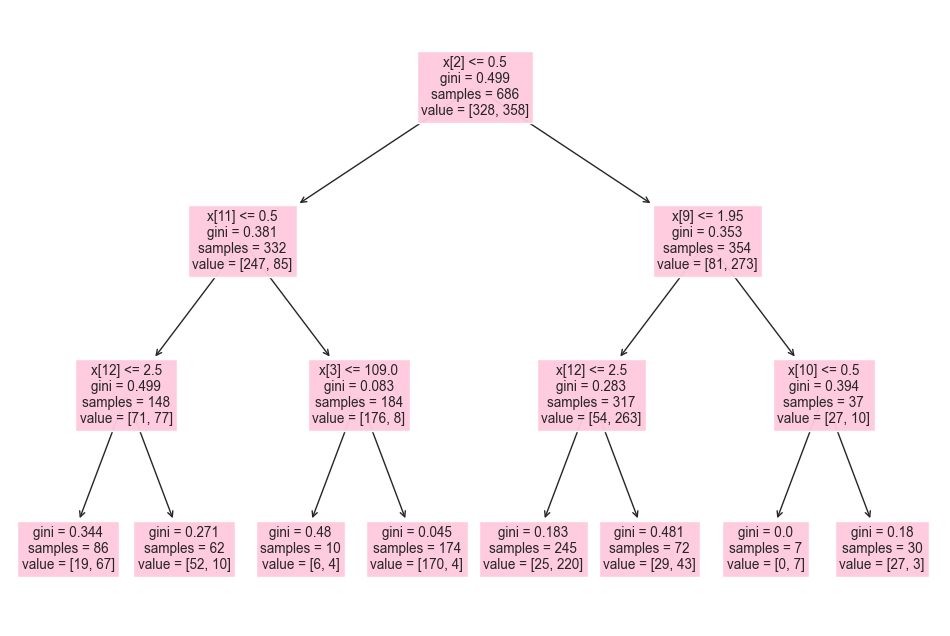

In [37]:
# way to visual decision tree leaf mode ,create figue for width  and  height
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train,y_train))

In [38]:
# Another way

import pandas as pd
import numpy as np
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

heart_data = pd.read_csv('heart_disease.csv')
y = heart_data['target']
x_data = heart_data.drop(['target'], axis=1)

model = tree.DecisionTreeClassifier()
model.fit(x_data, y)

# Get the class names from the dataset
class_names = heart_data['target'].unique().astype(str)

tree.export_graphviz(model, out_file='Nabbona_Prossy_Morning.dot',
                     feature_names=x_data.columns,
                     class_names=class_names,
                     label='all',
                     filled=True, rounded=True)
